# Transformations of Spacetime

We consider observers $s$ and $\hat s$, where $\hat s$ is moving at velocity $u$ relative to $s$.

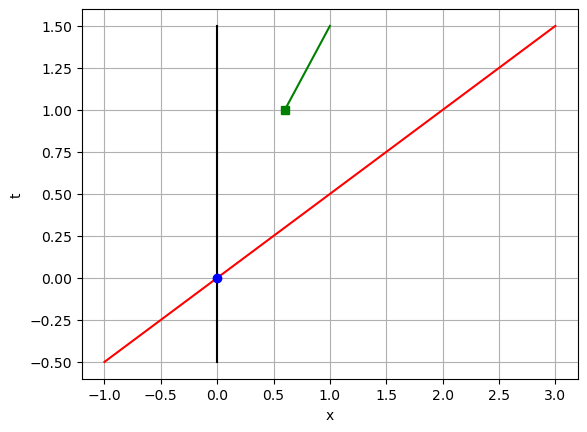

In [43]:
# Two Observers

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0,0],[-0.5,1.5],'k')
plt.plot([-1,3],[-0.5,1.5],'r')
plt.plot(0,0,'bo')
plt.plot(0.6,1,'gs')
plt.plot([0.6, 1], [1, 1.5], 'g')
#plt.text(0.57,0.875,'$x$')
#plt.text(0.57,1.05,'$\hat x$', color = 'r')
#plt.arrow(0,1,0.55,0,length_includes_head=True,width=0.015, color='k')
#plt.arrow(2,1,-1.35,0,length_includes_head=True,width=0.015, color='r')

plt.grid('on')
plt.xlabel('x')
plt.ylabel('t');

\begin{myfig}\label{fig:GT} We have a black observer at $(0,t)$ and a red observer at $(ut,t)$. They cross at the blue event - where they synchronize their watches, and then report the positions, in space and time, of the green event. The black observer places it to its right at $(0.6,1)$ while the red observer places it to its left at $(-1.5,1)$. A green observer travels from the green event at uniform velocity, $v$. The black observer registers the green observer at $(0.6+v(t-1),t)$ while the red observers place the green observer at $(-1.4+(v-u)t, t)$. \end{myfig}

If $s$ observes an event at $(x,t)$ then $\hat s$ observes it at $(\hat x,\hat t)$ where

\begin{equation}\label{eq:Lor0}
  \eqalign{\hat x &= \frac{x-ut}{\sqrt{1-u^2/c^2}} \cr
           \hat t &= \frac{t-(u/c^2)x}{\sqrt{1-u^2/c^2}} }
\end{equation}

This is known as a Lorentz Transformation. In the interest of commensurate units we may rather
consider the transformation of $(x,ct)$ to $(\hat x,c\hat t)$, namely

\begin{equation}\label{eq:Lor1}
  \eqalign{\hat x &= \frac{cx-uct}{\sqrt{c^2-u^2}} \cr
           c\hat t &= \frac{cct-ux}{\sqrt{c^2-u^2}} } \hskip 0.25in \hbox{that is,}\hskip 0.25in
           \begin{pmatrix} \hat x \\ c\hat t \end{pmatrix} =
           \frac{1}{\sqrt{c^2-u^2}}\begin{pmatrix} c & -u \\ -u & c \end{pmatrix}
           \begin{pmatrix} x \\ ct \end{pmatrix}
\end{equation}

we now note that

\begin{equation}\label{eq:LorCon}
\hat x^2 - (c\hat t)^2 = \frac{(cx-uct)^2 - (cct-ux)^2}{c^2-u^2} = 
   \frac{c^2x^2+u^2(ct)^2-c^2(ct)^2-u^2x^2}{c^2-u^2} = x^2-(ct)^2
\end{equation}

and see that Lorentz transforms preserve the signed distance function

\begin{equation}\label{eq:Mink1}
  d_M(v) \equiv v_0^2 - v_1^2
\end{equation}

for $v\in\maR^2$, where $M$ here is for Minkowski.


Lets suppose $u=ac$ and consider the action of

\begin{equation}\label{eq:LorMat}
  L(a) \equiv \frac{1}{\sqrt{1-a^2}}\begin{pmatrix} 1 & -a \\ -a & 1 \end{pmatrix}
\end{equation}

for $-1<a<1$. 

\begin{exercise}\label{ex:LorDet} (i) Evaluate the determinant of $L(a)$ and discuss how it transforms areas.

(ii) Confirm that $L(a)^{-1}=L(-a)$ and discuss its physical significance.
\end{exercise}

Lets now explore its transformation of grid points 

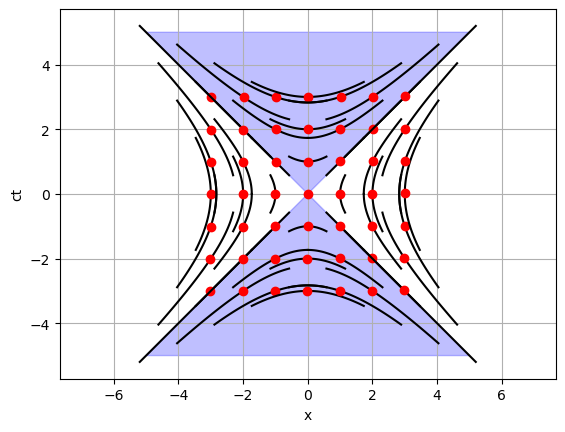

In [58]:
# Lorentz Transformation of grid points

%matplotlib inline    
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros(100)
y = np.zeros(100)
A = np.linspace(-.5,.5,100)
for i in range(-3,4):
        for j in range(-3,4):
            gp = [i,j]
            for k in range(100):
                a = A[k]
                L = np.array([[1,-a],[-a,1]])/np.sqrt(1-a**2)   # Lorentz Transformation
                Lgp = L@gp
                x[k] = Lgp[0]
                y[k] = Lgp[1]
            plt.plot(x,y,'k')
            plt.plot(x[49],y[49],'ro')
            
plt.fill([-5,0,5],[5,0,5],color='b', alpha=0.25)
plt.fill([-5,0,5],[-5,0,-5],color='b', alpha=0.25)
            
plt.grid('on')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('ct');   

\begin{myfig}\label{fig:LorHyp} The Lorentz Transformation (\ref{eq:LorMat}) moves each red grid point along a black hyperbola as the relative velocity $a$ moves from $-0.5$ to $0.5$. The (blue) cone where $(ct)^2>x^2$ is deemed **time-like** and its two pieces divide **future** $(t>0)$ from **past** (t<0). The complementary cone is deemed **space-like**. The two cones meet along the **null vectors** for which $(ct)^2=x^2$. \end{myfig}

\begin{exercise}\label{ex:LorEig} Show that the null vectors 
\begin{equation}\label{eq:nullvec}
v_0 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}  \and v_1 = \begin{pmatrix} -1 \\ 1 \end{pmatrix}
\end{equation}
are eigenvectors of $L(a)$. That is, show that $L(a)v_j=\la_jv_j$, and find the eigenvalues, $\la_0$ and $\la_1$, along the way.
\end{exercise}

We next look at the transformation of grid lines.

<IPython.core.display.Javascript object>


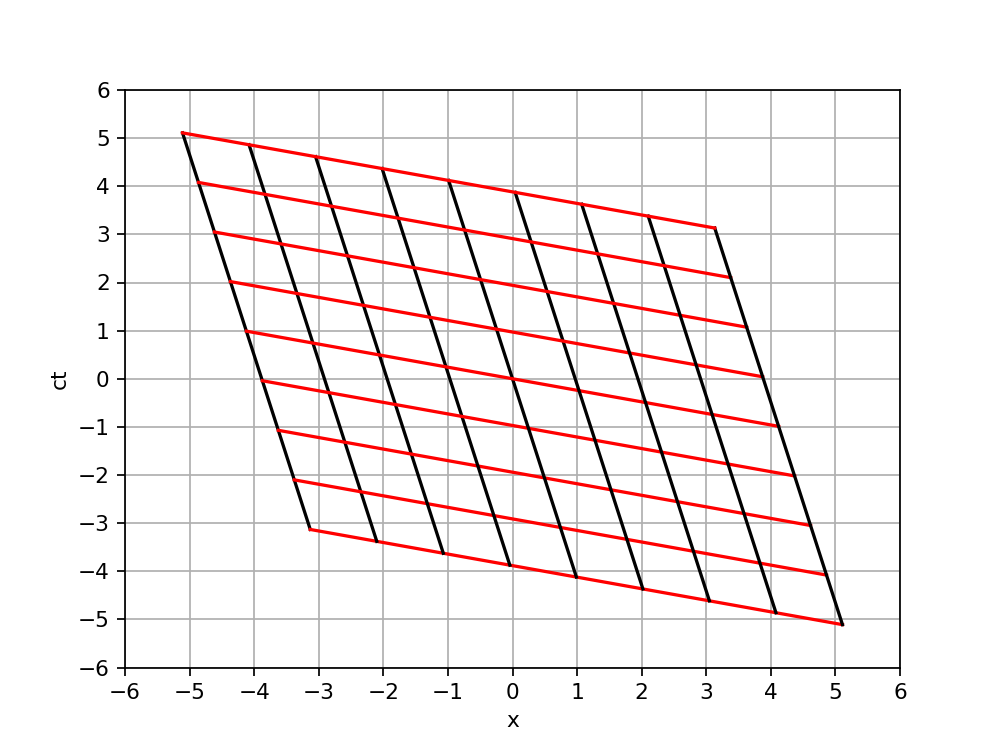

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5, step=0.01), Output()), _dom_c…

In [1]:
# Lorentz Transformation of (x,y) grid lines

%matplotlib notebook     
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(num=' ')

vert = []
horiz = []

for i in range(-4,5):     # instantiate vert and horizontal lines
    bob, = plt.plot([i, i],[-4,4],'k')  # vert
    vert.append(bob)
    betty, = plt.plot([-4,4],[i, i],'r')  # horiz
    horiz.append(betty)

plt.axis([-6,6,-6,6])
plt.xticks(np.arange(-6, 7, step=1)) 
plt.yticks(np.arange(-6, 7, step=1)) 
plt.grid('on')

plt.xlabel('x')
plt.ylabel('ct')

def update( a=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0) ):
    L = np.array([[1,-a],[-a,1]])/np.sqrt(1-a**2)   # Lorentz Transformation
    for i in range(-4,5):
        lo = L@[i,-4]
        hi = L@[i,4]
        vert[i+4].set_data([lo[0],hi[0]],[lo[1],hi[1]])  # trans vert
        lo = L@[-4,i]
        hi = L@[4,i]
        horiz[i+4].set_data([lo[0],hi[0]],[lo[1],hi[1]])  # trans horiz

    fig.canvas.draw_idle()

interact(update);
        

\begin{myfig}\label{fig:LorLines} The Lorentz Transformation (\ref{eq:LorMat}) shears grid cells at your command. \end{myfig}

\begin{exercise}\label{ex:LorRay} Adapt the widget above to explore the transformation of rays.
\end{exercise}

The upshot of all of this, and lets move to position in $\maR^3$, and define the Minkowski signed distance

\begin{equation}\label{eq:Mink3}
 d_M(v) \equiv v_0^2 + v_1^2 + v_2^2 - v_3^2
\end{equation}

We say that $L\in\maM_4(\maR)$ is a **Lorentz Transformation** when it preserves the Minkowski signed distance, i.e., when

\begin{equation}\label{eq:LorPres}
d_M(Lv) = d_M(v), \hskip 0.25in \forall v\in\maR^4
\end{equation}

\begin{exercise}\label{ex:LorProd} Please show that if $A$ and $B$ are Lorentz transformations then so too is $AB$
\end{exercise}

We now wish to show that Lorentz Trandformations are invertible. We set

\begin{equation}\label{eq:MinkM}
  M = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix} 
\end{equation}

and note that

\begin{exercise}\label{ex:LorRew} (i) For any $v\in\maR^4$ and $L\in\maM_4(\maR)$, $d_M(v) = v^TMv$ and $d_M(Lv) = (Lv)^TM(Lv)$ and so $d_M(Lv)=d_M(v)$ when 

\begin{equation}\label{eq:LorConM}
  L^TML = M.
\end{equation}

(ii) Now take the determinant of each side of (\ref{eq:LorConM}) and deduce that $\det(L)=\pm 1$.
\end{exercise}

We now consider some concrete examples; if $R(a,\theta)$ is a rotation in $\maR^3$ then

\begin{equation}\label{eq:LorR}
 L_R(a,\theta) \equiv \begin{pmatrix} R(a,\theta) & 0 \\ 0 & -1 \end{pmatrix}
\end{equation}

is a Lorentz Transformation. To play with time we need the hyperbolic functions.


\begin{exercise}\label{ex:hypfun} With the definitions

\begin{equation}\label{eq:hypfun}
  \cosh(b) \equiv \frac{\exp(b)+\exp(-b)}{2} \and \sinh(b) \equiv \frac{\exp(b)-\exp(-b)}{2}
\end{equation}

please confirm that

\begin{equation}\label{eq:hypfun2}
  \cosh^2(b) - \sinh^2(b) = 1
\end{equation}

\end{exercise}

\begin{exercise}\label{ex:LorB} Use the previous exercise to show that

\begin{equation}\label{eq:LorB}
  L_B(e_0,b) = \begin{pmatrix} \cosh(b) & 0 & 0 & -\sinh(b) \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ -\sinh(b) & 0 & 0 & \cosh(b) \end{pmatrix} 
\end{equation}

is a Lorentz transformation. The subscript $B$ stands for **boost.**

\end{exercise}

\begin{exercise}\label{ex:LorBa} Set $a=\tanh(b)$ and show that the $L_B(e_0,b)$ reduces to our original $L(a)$ in (\ref{eq:LorMat}). 
\end{exercise}

\begin{exercise}\label{ex:LorBu} The Lorentz boost by $b$ in the direction of the unit vector $u\in\maR^3$ is

\begin{equation}\label{eq:LorBu}
 L_B(u,b) \equiv \begin{pmatrix} I-uu^T + \cosh(b)uu^T & -\sinh(b)u \\ -\sinh(b)u^T & \cosh(b) \end{pmatrix}
\end{equation}

Please show that this indeed obeys $d_M(L_B(u,b)v)=d_M(v)$ for each $v\in\maR^4$.

\end{exercise}

Let us now show that every Lorentz transformation can be factored as a boost times a rotation. Let $L$ be a Lorentz transformation and set

\begin{equation}\label{eq:Lprod0}
  v = L\tau \where \tau = [0,0,0,1]^T
\end{equation}

is the time direction. As $L$ is Lorentz and $d_M(\tau)=-1$ it follows that $d_M(v)=-1$ and so $|v_3|>1$. If $v_3<0$ then choose $-\tau$ instead. As a result, we assume $v_3\ge 1$. Now choose $b$ such that $\cosh(b)=v_3$ and then $u\in\maR^3$ such that $-\sinh(b)u_j=v_j$ and confirm that $u$ is then a unit vector. We have produced a boost for which

\begin{equation}\label{eq:Lprod1}
  v = L_B(u,b)\tau 
\end{equation}

As a result, $L^{-1}_B(u,b)L\tau=\tau$, i.e., $L^{-1}_B(u,b)L$ leaves time unscathed, and hence must be a rotation $L_R(a,\theta)$ and so

\begin{equation}\label{eq:Lprod2}
  L = L_B(u,b)L_R(a,\theta) 
\end{equation}

as claimed.

To get a feel for boosts we identify their preferred directions.

\begin{exercise}\label{ex:BoostEig} Given a unit vector $u\in\maR^3$ let $v$ and $w$ be perpendicular unit vectors in the plane in $\maR^3$ perpendicular to $u$. Show that 

\begin{equation}\label{eq:BoostEig}
 L_B(u,b)[u,1]^T = \exp(-b)[u,1]^T, \hskip 0.25in
 L_B(u,b)[u,-1]^T = \exp(b)[u,-1]^T, \hskip 0.25in
 L_B(u,b)[v,0]^T = [v,0]^T, \hskip 0.25in
 L_B(u,b)[w,0]^T = [w,0]^T
\end{equation}

and that these eigenvectors $\{[u,1]^T, [u,-1]^T, [v,0]^T, [w,0]^T\}$ comprise an orthonormal basis for $\maR^4$.
\end{exercise}



Following Sternberg, for each $x\in\maR^4$ we build an $X\in\maM_2(\maC)$ as

\begin{equation}\label{eq:LorX}
 X = \begin{pmatrix} x_0+x_3 & x_1-ix_2 \\ x_1+ix_2 & x_0-x_3 \end{pmatrix}
\end{equation}

\begin{exercise}\label{ex:LorX} Please confirm that $X^*=X$ and that $\det(X)=\ell(x)$.
\end{exercise}